Test Pandas e Analisi Dati
Analizzare il csv fornito con gli strumenti visti a lezione e scrivere un report dell’analisi andando ad evidenziare I parametri più importanti e le loro relazioni.
Provare a dare una risposta all’importanza di alcuni parametri… non solo analizzare ma anche interpretare!
Consegnare un foglio Jupyter con il codice e I commenti sull’analisi entro le ore 13 a: mbagnoli999@gmail.com

In [142]:
## import iniziali

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns


In [143]:
## read iniziale

df = pd.read_csv("TMDB  IMDB MOVIES Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432295 entries, 0 to 432294
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    432295 non-null  int64  
 1   title                 432295 non-null  object 
 2   vote_average          432295 non-null  float64
 3   vote_count            432295 non-null  int64  
 4   status                432295 non-null  object 
 5   release_date          414562 non-null  object 
 6   revenue               432295 non-null  int64  
 7   runtime               432295 non-null  int64  
 8   adult                 432295 non-null  bool   
 9   backdrop_path         183573 non-null  object 
 10  budget                432295 non-null  int64  
 11  homepage              54111 non-null   object 
 12  tconst                432295 non-null  object 
 13  original_language     432295 non-null  object 
 14  original_title        432295 non-null  object 
 15  

In [144]:
## drop di colonne inutili o comunque non influenti

df = df.drop(["id", "backdrop_path", "homepage", "tconst", "poster_path"], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432295 entries, 0 to 432294
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   title                 432295 non-null  object 
 1   vote_average          432295 non-null  float64
 2   vote_count            432295 non-null  int64  
 3   status                432295 non-null  object 
 4   release_date          414562 non-null  object 
 5   revenue               432295 non-null  int64  
 6   runtime               432295 non-null  int64  
 7   adult                 432295 non-null  bool   
 8   budget                432295 non-null  int64  
 9   original_language     432295 non-null  object 
 10  original_title        432295 non-null  object 
 11  overview              391238 non-null  object 
 12  popularity            432295 non-null  float64
 13  tagline               90930 non-null   object 
 14  genres                355422 non-null  object 
 15  

In [145]:
## restringo il dominio di ricerca ai soli film rilasciati

df_released = df.loc[df["status"] == "Released"]

## posso droppare "status" dal dataframe adesso

df_released = df_released.drop(["status"], axis = 1)
df_released.head()


,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,original_title,...,tagline,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes
0,Inception,8.364,34495,2010-07-15,825532764,148,False,160000000,en,Inception,...,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,8.8,2615046
1,Interstellar,8.417,32571,2014-11-05,701729206,169,False,165000000,en,Interstellar,...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",8.7,2200215
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,False,185000000,en,The Dark Knight,...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",9.0,2946971
3,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,en,Avatar,...,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,7.9,1409099
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,False,220000000,en,The Avengers,...,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",8.0,1483869


In [146]:
## tokenizza adult da True/False a 1/0

print(type(df_released["adult"]))
df_released["adult"] = df_released["adult"].map({True: 1, False: 0})

## funziona anche con una lambda, ma map è più elastica
##df_released["adult"] = df_released["adult"].apply(lambda x: 0 if x == False else x)

df_released.head()

<class 'pandas.core.series.Series'>


,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,original_title,...,tagline,genres,production_companies,production_countries,spoken_languages,keywords,directors,writers,averageRating,numVotes
0,Inception,8.364,34495,2010-07-15,825532764,148,0,160000000,en,Inception,...,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",Christopher Nolan,Christopher Nolan,8.8,2615046
1,Interstellar,8.417,32571,2014-11-05,701729206,169,0,165000000,en,Interstellar,...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan",8.7,2200215
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,0,185000000,en,The Dark Knight,...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...",9.0,2946971
3,Avatar,7.573,29815,2009-12-15,2923706026,162,0,237000000,en,Avatar,...,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",James Cameron,James Cameron,7.9,1409099
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,0,220000000,en,The Avengers,...,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",Joss Whedon,"Joss Whedon, Zak Penn",8.0,1483869


In [155]:
## tokenizza la data per avere solo l'anno

print(type(df_released["release_date"][0]))
print(np.int64("120"))

df_released["release_date"] = df_released["release_date"].apply(lambda x: str(x).replace("-", ""))
print(type(df_released["release_date"][0]))
df_released["release_date"] = df_released["release_date"].apply(lambda x: np.int64(x))
print(type(df_released["release_date"][0]))


df_released.head()

<class 'str'>
120
<class 'str'>


ValueError: invalid literal for int() with base 10: 'nan'

<class 'pandas.core.frame.DataFrame'>
Index: 429393 entries, 0 to 432294
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   vote_average   429393 non-null  float64
 1   vote_count     429393 non-null  int64  
 2   release_date   429393 non-null  object 
 3   revenue        429393 non-null  int64  
 4   runtime        429393 non-null  int64  
 5   adult          429393 non-null  int64  
 6   budget         429393 non-null  int64  
 7   popularity     429393 non-null  float64
 8   averageRating  429393 non-null  float64
 9   numVotes       429393 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 52.2+ MB


TypeError: Image data of dtype object cannot be converted to float

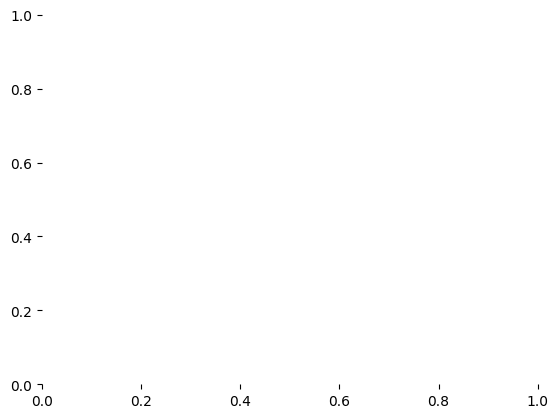

In [ ]:
## stampiamo la heatmap della sezione ristretta ai soli valori numerici

df_numerico = df_released.drop(["title","original_language", "original_title", "overview", "tagline", "genres", "production_companies", "production_countries", "spoken_languages", "keywords", "directors", "writers"], axis = 1)
df_numerico.info()

sns.heatmap(df_numerico, annot=True)

cose da cercare:

media revenue - budget
media costo per minuto di pellicola
media voti per paese di produzione
media voti per genere

correlazione per genere1 e genere2, vedi quanta popolarità

hotmap revenue budget vote_average

sopra e sotto budet medio vediamo la heatmap

variazione dei registi con il passare degli anni